In [1]:
import os
import argparse
import time
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(1000)
np.random.seed(1000)
import numpy as np
import torch
import torchvision
from torch.utils.data.dataset import Dataset
from torchvision import datasets, transforms
from torch import nn, optim
import matplotlib.pyplot as plt

In [2]:
interpolMeanNN = nn.Sequential(
    nn.Linear(1, 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, 1)
    ).to(torch.float64)
interpolVarNN = nn.Sequential(
    nn.Linear(1, 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, 1)
    ).to(torch.float64)

In [3]:
interpolMeanNN.load_state_dict(torch.load('interpolMean_64_64.pth'))
interpolVarNN.load_state_dict(torch.load('interpolVar_64_64.pth'))

<All keys matched successfully>

In [4]:
interpolMeanNN.eval()
interpolVarNN.eval()

Sequential(
  (0): Linear(in_features=1, out_features=64, bias=True)
  (1): Tanh()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): Tanh()
  (4): Linear(in_features=64, out_features=1, bias=True)
)

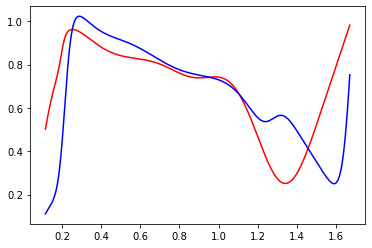

In [5]:
x_test = torch.unsqueeze(torch.linspace(0.1156, 1.670, 1999), dim=1).double()
y_test1 = interpolMeanNN(x_test)
y_test2 = interpolVarNN(x_test)


plt.plot(x_test, y_test1.detach().numpy(), 'r')
plt.plot(x_test, y_test2.detach().numpy(), 'b')
plt.show()